# Pharos Data Extract

In [1]:
import json
import os
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

with open("config.json") as json_data_file:
    config = json.load(json_data_file)
pd.options.display.max_columns = None    

In [2]:
categories=['help', 'dance', 'money', 'wedding', 'sleep', 'medical_emergency', 'cold', 'hate', 
            'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 
            'masculine', 'feminine', 'battles', 'prison', 'health', 'dispute', 'horror', 'leisure', 'royalty', 'wealthy', 
            'tourism', 'school', 'magic', 'beach', 'morning', 'social_media', 'exercise', 'night', 'kill', 'art', 'play', 
            'computer', 'college', 'optimism', 'stealing', 'home', 'fear', 'superhero', 'driving', 'pet', 'childish', 
            'cooking', 'hipster', 'internet', 'surprise', 'reading', 'movement', 'body', 'noise', 'eating', 'medieval', 
            'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebration', 'restaurant', 'violence', 'military', 
            'swimming', 'new', 'love', 'old', 'air_travel', 'fight', 'dominant_personality', 'music', 'vehicle', 'polite', 
            'toy', 'farming', 'war', 'speaking', 'listen', 'urban', 'shopping', 'disgust', 'fire', 'tool', 'phone', 'sound', 
            'injury', 'sailing', 'rage', 'science', 'work', 'appearance', 'valuable', 'warmth', 'youth', 'sadness', 'fun', 
            'emotional', 'joy', 'affection', 'traveling', 'fashion', 'ugliness', 'anger', 'ship', 'clothing', 'car', 
            'strength', 'technology', 'animal', 'party', 'smell', 'plant', 'beauty', 'negative_emotion', 'cleaning', 
            'messaging', 'competing', 'friends', 'achievement', 'liquid', 'weapon', 'children', 'ocean', 
            'giving', 'contentment', 'writing', 'rural', 'positive_emotion', 'musical', 'excite', 'song', 'sharing', 
            'fighting', 'battles', 'magic', 'alien', 'creature', 'new', 'duty', 'responsibility', 'boys', 'girls', 
            'young', 'old', 'monsters', 'games']

In [3]:
frame = pd.read_pickle(os.path.join(config['Data_path'],'YT_Database.pck'))

In [4]:
frame['brand'] = 'No Brand Yet'
frame = frame[~frame['show'].isna()]
frame.loc[frame['Stripped_Desc'] == 'Loading...', 'Stripped_Desc'] = 'No Description' 
frame['cluster'] = 'No cluster Yet'
frame['brand'] = frame['brand'].fillna('No Brand Yet')  
frame.loc[frame['brand'] == '', 'brand'] = 'No Brand Yet'

In [5]:
frame

,Unnamed: 0,video_id,channel_id,channel_display_name,time_uploaded,time_published,video_title,video_length,views,comments,video_privacy_status,video_url,category,embedding_allowed,ratings_allowed,comments_allowed,claim_origin,content_type,upload_source,claimed_by_this_owner,claimed_by_another_owner,other_owners_claiming,offweb_syndicatable,claim_id,asset_id,custom_id,effective_policy,third_party_video_id,in_video_ads_enabled,third_party_ads_enabled,display_ads_enabled,sponsored_cards_enabled,overlay_ads_enabled,nonskippable_video_ads_enabled,long_nonskippable_video_ads_enabled,skippable_video_ads_enabled,prerolls_enabled,midrolls_enabled,postrolls_enabled,isrc,eidr,is_made_for_kids_user_selection,is_made_for_kids_effective_setting,is_made_for_kids_modifiable,description,translated_title,translated_desc,Stripped_Desc,Emotion,Categories,Concepts,Keywords,Sentiment,tags_desc,Translated_Title,show,lang,market,Top_Emotion,Top_Category,brand,cluster
0,0,--CIRHzVMQU,UCGydrkfIhUDNCotYQI8TJhA,Cartoon Network UK,2015/09/25 08:49:19,2015/10/11 04:00:00,Classic Ben 10 | Stuck On Ben | Cartoon Network,104,7507215,194,Public,https://www.youtube.com/watch?v=--CIRHzVMQU,Entertainment,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,L3r9i-NyMP8,A801257478207946,--CIRHzVMQU,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Get your party started with Ben 10! Go to http...,Classic Ben 10 | Stuck On Ben | Cartoon Network,Get your party started with Ben 10! Go to http...,Get your party started with Ben 10! Ben 10 has...,"[[sadness, joy, fear, disgust, anger], [0.1506...","[[score, label], [0.719824, /style and fashion...","[[text, relevance, dbpedia_resource], [Ben 10,...","[[text, relevance, count], [Ben, 0.812975, 1, ...","[[score, label], [-0.781993, negative]]",wedding leisure celebration fun party,Classic Ben 10 | Stuck On Ben | Cartoon Network,ben 10,en,UK,joy,/style and fashion/clothing/pants,No Brand Yet,No cluster Yet
1,1,--DANjagvCo,UCJZ35DzvSPelEvLtFMQiOpw,Boomerang France,2017/12/14 07:23:49,2018/01/18 23:00:01,La blague de Chester | Bunnicula | Boomerang,183,292521,11,Public,https://www.youtube.com/watch?v=--DANjagvCo,Film & Animation,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,OMX47ZsYiZ0,A251431506443225,--DANjagvCo,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Chester en a marre des farces de ses amis ! Il...,The joke of Chester | Bunnicula | Boomerang,Chester's tired jokes of his friends! He decid...,Chester's tired jokes of his friends! He decid...,"[[sadness, joy, fear, disgust, anger], [0.3498...","[[score, label], [0.686522, /art and entertain...","[[text, relevance, dbpedia_resource], [Death, ...","[[text, relevance, count], [Chester's tired jo...","[[score, label], [-0.971572, negative]]",sleep aggression horror morning social_media n...,The joke of Chester | Bunnicula | Boomerang,bunnicula,fr,France,fear,/art and entertainment/shows and events,No Brand Yet,No cluster Yet
2,2,--F8etk_gL0,UCceqaG2CbXdKeIV3wv7F-vA,Cartoon Network Nederland,2017/11/10 09:30:53,2017/11/11 07:00:00,Mighty MagiSwords | Avonturen Academie: Ham va...,118,2028,0,Public,https://www.youtube.com/watch?v=--F8etk_gL0,Entertainment,Yes,Yes,Yes,SFTP upload,PARTNER_UPLOADED,DROPBOX_AGENT_UPLOAD,Yes,No,NaN,Yes,IrAWhxYKxYo,A104653451639172,NaN,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,👊 Teeny Titans - Teen Titans Go! | Download nu...,Mighty Magis Words | Adventure Academy: Ham gl...,👊 Teeny Titans - Teen Titans Go! | Download no...,,not found,not found,not found,not found,not found,,Mighty Magis Words | Adventure Academy: Ham gl...,mighty magiswords,nl,Benelux,No Emotion,No top category,No Brand Yet,No cluster Yet
3,3,--HOqPdLUgw,UCqndRprQFdjVv2GYxhn1csg,Boomerang Benelux,2018/03/23 07:40:20,2018/0

In [6]:
frame.columns

Index(['Unnamed: 0', 'video_id', 'channel_id', 'channel_display_name',
       'time_uploaded', 'time_published', 'video_title', 'video_length',
       'views', 'comments', 'video_privacy_status', 'video_url', 'category',
       'embedding_allowed', 'ratings_allowed', 'comments_allowed',
       'claim_origin', 'content_type', 'upload_source',
       'claimed_by_this_owner', 'claimed_by_another_owner',
       'other_owners_claiming', 'offweb_syndicatable', 'claim_id', 'asset_id',
       'custom_id', 'effective_policy', 'third_party_video_id',
       'in_video_ads_enabled', 'third_party_ads_enabled',
       'display_ads_enabled', 'sponsored_cards_enabled', 'overlay_ads_enabled',
       'nonskippable_video_ads_enabled', 'long_nonskippable_video_ads_enabled',
       'skippable_video_ads_enabled', 'prerolls_enabled', 'midrolls_enabled',
       'postrolls_enabled', 'isrc', 'eidr', 'is_made_for_kids_user_selection',
       'is_made_for_kids_effective_setting', 'is_made_for_kids_modifiable',
  

In [9]:
frame_to_save = frame[['video_id', 'translated_title', 'translated_desc',
                      'Stripped_Desc', 'tags_desc', 'show', 'lang']]

In [20]:
frame_to_save.to_csv('C:\\Users\\aquarshie\\OneDrive - WarnerMedia\\Desktop\\BI Work\\Pharos Project\\Data\\frame_to_save.csv', index=False)

In [10]:
frame_to_save

,video_id,translated_title,translated_desc,Stripped_Desc,tags_desc,show,lang
0,--CIRHzVMQU,Classic Ben 10 | Stuck On Ben | Cartoon Network,Get your party started with Ben 10! Go to http...,Get your party started with Ben 10! Ben 10 has...,wedding leisure celebration fun party,ben 10,en
1,--DANjagvCo,The joke of Chester | Bunnicula | Boomerang,Chester's tired jokes of his friends! He decid...,Chester's tired jokes of his friends! He decid...,sleep aggression horror morning social_media n...,bunnicula,fr
2,--F8etk_gL0,Mighty Magis Words | Adventure Academy: Ham gl...,👊 Teeny Titans - Teen Titans Go! | Download no...,,,mighty magiswords,nl
3,--HOqPdLUgw,Tom and Jerry | A hopeless quest | Boomerang,Detectives Tom and Jerry are at their wits end...,Detectives Tom and Jerry are at their wits end...,vacation morning childish dominant_personality...,tom and jerry,nl
5,--UAa97dKqc,The Looney Tunes Show | New Roomie | Boomerang UK,"Yosemite Sam is going though difficult times, ...","Yosemite Sam is going though difficult times, ...",help strength,looney tunes,en
...,...,...,...,...,...,...,...
58234,zzg9WhbT_CU,Ben 10 | Legendary slope | cartoon Network,Subscribe to Cartoon Network channel on YouTub...,,,ben 10,ar
58235,zzjOJoSP3R8,Happos Cartoon Compilation 6 for kids I The Ha...,"Watch full episodes of Flower Happo, Ballerina...",Each Hippo has a different fun personality. Th...,vacation leisure play computer optimism home d...,the happos family,en
58236,zznD-ax82HE,"An action packed | Ninjago, Gormiti Nature Unl...",No Description,No Description,,ninjago,it
58237,zzpXn9biQ9U,Scooby Doo and Guess Who | Nightmare | Bomirang,Come and Akchwo the finest performances Bomira...,Come and Akchwo the finest performances Bomira...,wedding optimism affection beauty,scooby-doo,ar


In [9]:
fr2 = frame.copy().loc[frame['Translated_Title'] != 'Video not available']

In [10]:
fr2

,Unnamed: 0,video_id,channel_id,channel_display_name,time_uploaded,time_published,video_title,video_length,views,comments,video_privacy_status,video_url,category,embedding_allowed,ratings_allowed,comments_allowed,claim_origin,content_type,upload_source,claimed_by_this_owner,claimed_by_another_owner,other_owners_claiming,offweb_syndicatable,claim_id,asset_id,custom_id,effective_policy,third_party_video_id,in_video_ads_enabled,third_party_ads_enabled,display_ads_enabled,sponsored_cards_enabled,overlay_ads_enabled,nonskippable_video_ads_enabled,long_nonskippable_video_ads_enabled,skippable_video_ads_enabled,prerolls_enabled,midrolls_enabled,postrolls_enabled,isrc,eidr,is_made_for_kids_user_selection,is_made_for_kids_effective_setting,is_made_for_kids_modifiable,description,translated_title,translated_desc,Stripped_Desc,Emotion,Categories,Concepts,Keywords,Sentiment,tags_desc,Translated_Title,show,lang,market,Top_Emotion,Top_Category,brand,cluster
0,0,--CIRHzVMQU,UCGydrkfIhUDNCotYQI8TJhA,Cartoon Network UK,2015/09/25 08:49:19,2015/10/11 04:00:00,Classic Ben 10 | Stuck On Ben | Cartoon Network,104,7507215,194,Public,https://www.youtube.com/watch?v=--CIRHzVMQU,Entertainment,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,L3r9i-NyMP8,A801257478207946,--CIRHzVMQU,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Get your party started with Ben 10! Go to http...,Classic Ben 10 | Stuck On Ben | Cartoon Network,Get your party started with Ben 10! Go to http...,Get your party started with Ben 10! Ben 10 has...,"[[sadness, joy, fear, disgust, anger], [0.1506...","[[score, label], [0.719824, /style and fashion...","[[text, relevance, dbpedia_resource], [Ben 10,...","[[text, relevance, count], [Ben, 0.812975, 1, ...","[[score, label], [-0.781993, negative]]",wedding leisure celebration fun party,Classic Ben 10 | Stuck On Ben | Cartoon Network,ben 10,en,UK,joy,/style and fashion/clothing/pants,No Brand Yet,No cluster Yet
1,1,--DANjagvCo,UCJZ35DzvSPelEvLtFMQiOpw,Boomerang France,2017/12/14 07:23:49,2018/01/18 23:00:01,La blague de Chester | Bunnicula | Boomerang,183,292521,11,Public,https://www.youtube.com/watch?v=--DANjagvCo,Film & Animation,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,OMX47ZsYiZ0,A251431506443225,--DANjagvCo,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Chester en a marre des farces de ses amis ! Il...,The joke of Chester | Bunnicula | Boomerang,Chester's tired jokes of his friends! He decid...,Chester's tired jokes of his friends! He decid...,"[[sadness, joy, fear, disgust, anger], [0.3498...","[[score, label], [0.686522, /art and entertain...","[[text, relevance, dbpedia_resource], [Death, ...","[[text, relevance, count], [Chester's tired jo...","[[score, label], [-0.971572, negative]]",sleep aggression horror morning social_media n...,The joke of Chester | Bunnicula | Boomerang,bunnicula,fr,France,fear,/art and entertainment/shows and events,No Brand Yet,No cluster Yet
2,2,--F8etk_gL0,UCceqaG2CbXdKeIV3wv7F-vA,Cartoon Network Nederland,2017/11/10 09:30:53,2017/11/11 07:00:00,Mighty MagiSwords | Avonturen Academie: Ham va...,118,2028,0,Public,https://www.youtube.com/watch?v=--F8etk_gL0,Entertainment,Yes,Yes,Yes,SFTP upload,PARTNER_UPLOADED,DROPBOX_AGENT_UPLOAD,Yes,No,NaN,Yes,IrAWhxYKxYo,A104653451639172,NaN,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,👊 Teeny Titans - Teen Titans Go! | Download nu...,Mighty Magis Words | Adventure Academy: Ham gl...,👊 Teeny Titans - Teen Titans Go! | Download no...,,not found,not found,not found,not found,not found,,Mighty Magis Words | Adventure Academy: Ham gl...,mighty magiswords,nl,Benelux,No Emotion,No top category,No Brand Yet,No cluster Yet
3,3,--HOqPdLUgw,UCqndRprQFdjVv2GYxhn1csg,Boomerang Benelux,2018/03/23 07:40:20,2018/0

## Visualisation Logic

In [7]:
# Run this cell once
dataset = widgets.Dropdown(
    options=['Web', 'YouTube', 'Wildbrain','YT and Wildbrain', 'Linear', 'Adult Swim', 'Boing'],
    value='YouTube',
    description='Dataset:',
    disabled=False,
)

display(dataset)

#display(weight)

Dropdown(description='Dataset:', index=1, options=('Web', 'YouTube', 'Wildbrain', 'YT and Wildbrain', 'Linear'…

In [11]:
# Re-run this cell when selecting a new dataset

if dataset.value == 'YouTube':
    frame = fr2.copy()
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'Wildbrain':
    frame = fr2_Wildbrain.copy()
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'YT and Wildbrain':
    frame = fr2_Wildbrain.copy().append(fr2.copy())
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'Web':
    frame = fr2_web.copy().loc[fr2_web['tags_desc'].str.len() != 0]
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
    
# elif dataset.value == 'HBO':
#     avg = widgets.Dropdown(
#     options=['Mean Episode Rating', 'Median Episode Rating'], #'Watch time', 'Comments'],
#     value='Mean Episode Rating',
#     description='Metric:',
#     disabled=False,
#     )
    
#     frame = fr2_HBO.copy()
# elif dataset.value == 'HBO-Toonix':
#     avg = widgets.Dropdown(
#     options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
#     value='Mean views',
#     description='Metric:',
#     disabled=False,
#     )
    
#     frame = fr2_HBO_Toonix.copy()
elif dataset.value == 'Linear':
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )    
    frame = fr2_Linear.copy()
elif dataset.value == 'Adult Swim':
    avg = widgets.Dropdown(
    options=['Mean Episode Rating', 'Median Episode Rating'], #'Watch time', 'Comments'],
    value='Mean Episode Rating',
    description='Metric:',
    disabled=False,
    )
    frame = fr2_AS.copy()
elif dataset.value == 'Boing':
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )    
    
    frame = fr2_boing.copy()
    
show = widgets.SelectMultiple(
    options=list(frame['show'].unique()) + ['All'],
    value=['All'],
    description='Show:',
    disabled=False,
)

lang = widgets.SelectMultiple(
    options=list(frame['lang'].unique()) + ['All'],
    value=['All'],
    description='Language:',
    disabled=False,
)

emot = widgets.SelectMultiple(
    options=list(frame['Top_Emotion'].unique()) + ['All'],
    value=['All'],
    description='Emotion:',
    disabled=False,
)

plot = widgets.Dropdown(
    options=['Themes', 'Categories', 'Emotions', 'Clusters', 'Second Categories'],
    value='Themes',
    description='Plot:',
    disabled=False,
)
plot_rel = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Relative plot?:',
    disabled=False,
)

channel = widgets.SelectMultiple(
    options=list(frame['channel_display_name'].unique()) + ['All'],
    value=['All'],
    description='Channel:',
    disabled=False,
)
brand = widgets.SelectMultiple(
    options=list(frame['brand'].unique()) + ['All'],
    value=['All'],
    description='Brand:',
    disabled=False,
)

weight = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Adjust for length?:',
    disabled=False,
)
cluster = widgets.SelectMultiple(
    options=list(frame['cluster'].unique()) + ['All'],
    value=['All'],
    description='Cluster:',
    disabled=False,
)
ascending = widgets.Dropdown(
    options=[True, False],
    value=False,
    description='Ascending?:',
    disabled=False,
)


display(show)
display(lang)
display(emot)

# if not dataset.value in ['HBO', 'HBO-Toonix']:
#     display(channel)
    
display(brand)
display(avg)
display(plot)
display(plot_rel)
display(cluster)
display(ascending)

SelectMultiple(description='Show:', index=(100,), options=('ben 10', 'bunnicula', 'mighty magiswords', 'tom an…

SelectMultiple(description='Language:', index=(20,), options=('en', 'fr', 'nl', 'hu', 'es', 'ru', 'pl', 'no', …

SelectMultiple(description='Emotion:', index=(6,), options=('joy', 'fear', 'No Emotion', 'sadness', 'disgust',…

SelectMultiple(description='Brand:', index=(1,), options=('No Brand Yet', 'All'), value=('All',))

Dropdown(description='Metric:', options=('Mean views', 'Median views'), value='Mean views')

Dropdown(description='Plot:', options=('Themes', 'Categories', 'Emotions', 'Clusters', 'Second Categories'), v…

Dropdown(description='Relative plot?:', index=1, options=('Yes', 'No'), value='No')

SelectMultiple(description='Cluster:', index=(1,), options=('No cluster Yet', 'All'), value=('All',))

Dropdown(description='Ascending?:', index=1, options=(True, False), value=False)

In [12]:
def pick_frame(frame):
    if list(show.value) != ['All']:
        frame = frame.loc[frame['show'].str.contains('|'.join(show.value),case=False, regex=True)]
    if list(lang.value) != ['All']:
        frame = frame.loc[frame['lang'].str.contains('|'.join(lang.value),case=False, regex=True)]
    if list(emot.value) != ['All']:
        frame = frame.loc[frame['Top_Emotion'].str.contains('|'.join(emot.value),case=False, regex=True)]
    if list(brand.value) != ['All']:
        frame = frame.loc[frame['brand'].str.contains('|'.join(brand.value),case=False, regex=True)]
    if list(channel.value) != ['All']:
        frame = frame.loc[frame['channel_display_name'].str.contains('|'.join(channel.value),case=False, regex=True)]
    if list(cluster.value) != ['All']:
        frame = frame.loc[frame['cluster'].str.contains('|'.join(cluster.value),case=False, regex=True)]
    return frame

In [13]:
def vis(frame, plot, avg, plot_rel, dataset, ascending):    
    if plot == 'Themes':
        def cat_to_views(cat):
            views = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].mean()
            #print(views)
            count = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)].shape[0]
            #print(count)
            count_adj = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['video_length'].sum()
            
            median = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].median()
            
            comments = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['comments'].median()
            
            #watch_time = frame.loc[frame['tags_desc'].str.contains(cat)]['watch_time'].median()
            
            return [views, count, count_adj, median, comments]# watch_time]


        vcount = {}

        for cat in categories:
            if cat_to_views(cat)[1] != 0:
                vcount[cat] = cat_to_views(cat)


        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean views':
            df = df.sort_values(by=0, ascending=ascending).head(50)
        elif avg.value == 'Median views':
            df = df.sort_values(by=3, ascending=ascending).head(50)
        #elif avg.value == 'Watch time':
            #df = df.sort_values(by=5, ascending=False)[:50]
        elif avg.value == 'Comments':
            df = df.sort_values(by=4, ascending=ascending).head(50)
            
            
        if weight.value == 'Yes':
            plt.bar(df.index.to_series()[:],df[2][:], color=sns.color_palette("hls", len(df.index)+1))
        else:
            plt.bar(df.index.to_series()[:],df[1][:], color=sns.color_palette("hls", len(df.index)+1))
            
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series()[:], df[0][:], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df[3][:], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
            
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Categories':
        
        if list(frame['Top_theme'].unique()) == ['Not Yet']:
            print('No category added yet!')
            return
        
        if avg.value == 'Mean views':
            df = frame.groupby('Top_theme').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','mean'), ascending = False)
        else:
            df = frame.groupby('Top_theme').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','median'), ascending = False)
        
        df = df.head(30)
        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series()[:], df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df['views']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Emotions':
        
        if list(frame['Top_Emotion'].unique()) == ['Not Yet']:
            print('No emotions added yet!')
            return
            
        def cat_clust_to_views(cat):
            views = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['views'].sum()
            #print(frame.loc[(frame['tags_desc'].str.contains(cat))])
            #print((frame['tags_desc'].str.contains(cat)) & (frame['lang'] == lang))
            count = frame.loc[(frame['Top_Emotion'].str.contains(cat))].shape[0]
            #print(cat,views,count)
            median = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['views'].median()
            return [views//count, views, count, median]


        vcount = {}

        for cat in frame['Top_Emotion'].unique():
            vcount[cat] = cat_clust_to_views(cat)
        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean views':
            df = df.sort_values(by=0, ascending=False)[:50]
        else:
            df = df.sort_values(by=3, ascending=False)[:50] 
        plt.bar(df.index.to_series(),df[2], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df[0], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df[3], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        axes2.set_ylim(bottom = 0)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Second Categories':
                
            
        if list(frame['Second_theme'].unique()) == ['Not Yet']:
            print('No second theme added yet!')
            return
        
        if avg.value == 'Mean views':
            df = frame.groupby('Second_theme').agg({'views' : ['mean', 'count']}).sort_values(by =('views','mean'), ascending = False).head(30)
        else:
            df = frame.groupby('Second_theme').agg({'views' : ['median', 'count']}).sort_values(by =('views','median'), ascending = False).head(30)

        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['views']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Clusters':
        
        if list(frame['cluster'].unique()) == ['Not Yet']:
            print('No cluster added yet!')
            return
        
        df = frame.groupby('cluster').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','mean'), ascending = False)

        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['views']['median'].sort_values(ascending=False), color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Tag Cluster':
        df = frame.groupby('show').agg({'views' : ['mean', 'count']}).sort_values(by =('views','mean'), ascending = False).head(25)
        dictionary = dict(zip(df.index.unique(), np.arange(len(df.index.unique()))))
        fig, ax = plt.subplots()
        df = df['views']['count']
        # Manually Entering Colors
        cmap = matplotlib.cm.coolwarm
        # Min and Max Values
        mini = min(df)
        maxi = max(df)
        # Finding Colors for each tile
        norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
        colors = [sns.color_palette("Pastel1", len(df.index))[dictionary[value]] for value in df.index]
        #colors = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
        # Plot#

        #print()
        labels = [i for i in df.index]
        df.plot.pie(colormap = matplotlib.cm.coolwarm)
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title(dataset + ": Tag breakdown for Show: " + show.value + ',\n language: ' + ' and '.join(lang.value) + ',\n emotion: ' + emot.value + ', selected channels' +', and Brand: ' + brand.value, fontsize=32, color="Black")
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        fig.set_facecolor('#effeef')
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Market":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        emotions = frame['Top_Emotion'].unique()
        frame = frame.loc[frame['lang'] != 'nl']
        df = frame.groupby(['lang','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by market')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Show":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        shows = frame['show'].unique()
        df = frame.groupby(['show','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())[1:]
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by Show')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
    plot_title = '{dataset}: {plot} plotted against views'
    plt.title(plot_title.format(dataset=dataset, plot=plot))
    plt.legend()
    plt.tight_layout()
    plt.show()


names =['Responsibility, aspirational stories, morals', 'Secret, mysterious', 
        'Songs, music', 'Adventurous heroes', "Compilations and best-of's", 'Games', 'Dance', 
        'New, Novelty seekers', 'Villains', 'Teamwork, Good vs. Evil', 
        'Fighting Battles', 'Learning, How-to', 'Makers', 'Aliens and Monsters', 
        'Fantasy Magic Fighters']
        

fr2 = frame.copy().loc[frame['Translated_Title'] != 'Video not available']
# fr2_Wildbrain = frame_Wildbrain.copy().loc[frame_Wildbrain['Translated_Title'] != 'Video not available']
# fr2_web = frame_web.copy()
# # fr2_HBO = frame_HBO.copy()
# # fr2_HBO_Toonix = frame_HBO_Toonix.copy()
# fr2_AS = frame_AS.copy()
# fr2_Linear = frame_Linear.copy()
# fr2_boing = frame_boing.copy()

C:\Users\aquarshie\Anaconda3\envs\old_python\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


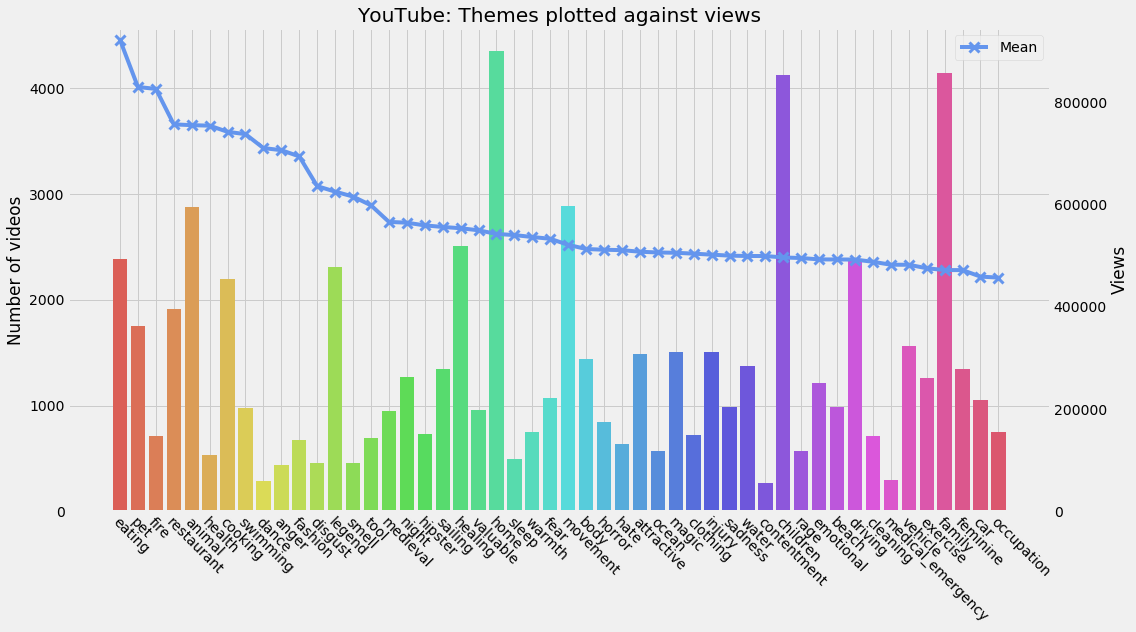

In [14]:
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Use ggplot style
style.use('fivethirtyeight')

if dataset.value == 'YouTube':
    frame = fr2.copy()
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg, plot_rel.value, dataset.value, ascending.value )

In [15]:
frame

,Unnamed: 0,video_id,channel_id,channel_display_name,time_uploaded,time_published,video_title,video_length,views,comments,video_privacy_status,video_url,category,embedding_allowed,ratings_allowed,comments_allowed,claim_origin,content_type,upload_source,claimed_by_this_owner,claimed_by_another_owner,other_owners_claiming,offweb_syndicatable,claim_id,asset_id,custom_id,effective_policy,third_party_video_id,in_video_ads_enabled,third_party_ads_enabled,display_ads_enabled,sponsored_cards_enabled,overlay_ads_enabled,nonskippable_video_ads_enabled,long_nonskippable_video_ads_enabled,skippable_video_ads_enabled,prerolls_enabled,midrolls_enabled,postrolls_enabled,isrc,eidr,is_made_for_kids_user_selection,is_made_for_kids_effective_setting,is_made_for_kids_modifiable,description,translated_title,translated_desc,Stripped_Desc,Emotion,Categories,Concepts,Keywords,Sentiment,tags_desc,Translated_Title,show,lang,market,Top_Emotion,Top_Category,brand,cluster
0,0,--CIRHzVMQU,UCGydrkfIhUDNCotYQI8TJhA,Cartoon Network UK,2015/09/25 08:49:19,2015/10/11 04:00:00,Classic Ben 10 | Stuck On Ben | Cartoon Network,104,7507215,194,Public,https://www.youtube.com/watch?v=--CIRHzVMQU,Entertainment,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,L3r9i-NyMP8,A801257478207946,--CIRHzVMQU,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Get your party started with Ben 10! Go to http...,Classic Ben 10 | Stuck On Ben | Cartoon Network,Get your party started with Ben 10! Go to http...,Get your party started with Ben 10! Ben 10 has...,"[[sadness, joy, fear, disgust, anger], [0.1506...","[[score, label], [0.719824, /style and fashion...","[[text, relevance, dbpedia_resource], [Ben 10,...","[[text, relevance, count], [Ben, 0.812975, 1, ...","[[score, label], [-0.781993, negative]]",leisure celebration fun party,Classic Ben 10 | Stuck On Ben | Cartoon Network,ben 10,en,UK,joy,/style and fashion/clothing/pants,No Brand Yet,No cluster Yet
1,1,--DANjagvCo,UCJZ35DzvSPelEvLtFMQiOpw,Boomerang France,2017/12/14 07:23:49,2018/01/18 23:00:01,La blague de Chester | Bunnicula | Boomerang,183,292521,11,Public,https://www.youtube.com/watch?v=--DANjagvCo,Film & Animation,Yes,Yes,Yes,Web Upload By Owner,PARTNER_UPLOADED,WEB_UPLOAD,Yes,No,NaN,Yes,OMX47ZsYiZ0,A251431506443225,--DANjagvCo,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,Chester en a marre des farces de ses amis ! Il...,The joke of Chester | Bunnicula | Boomerang,Chester's tired jokes of his friends! He decid...,Chester's tired jokes of his friends! He decid...,"[[sadness, joy, fear, disgust, anger], [0.3498...","[[score, label], [0.686522, /art and entertain...","[[text, relevance, dbpedia_resource], [Death, ...","[[text, relevance, count], [Chester's tired jo...","[[score, label], [-0.971572, negative]]",sleep aggression horror morning social_media n...,The joke of Chester | Bunnicula | Boomerang,bunnicula,fr,France,fear,/art and entertainment/shows and events,No Brand Yet,No cluster Yet
2,2,--F8etk_gL0,UCceqaG2CbXdKeIV3wv7F-vA,Cartoon Network Nederland,2017/11/10 09:30:53,2017/11/11 07:00:00,Mighty MagiSwords | Avonturen Academie: Ham va...,118,2028,0,Public,https://www.youtube.com/watch?v=--F8etk_gL0,Entertainment,Yes,Yes,Yes,SFTP upload,PARTNER_UPLOADED,DROPBOX_AGENT_UPLOAD,Yes,No,NaN,Yes,IrAWhxYKxYo,A104653451639172,NaN,"Monetize in all countries except: CU, IR, KP, ...",NaN,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,NaN,NaN,Yes,Yes,Yes,👊 Teeny Titans - Teen Titans Go! | Download nu...,Mighty Magis Words | Adventure Academy: Ham gl...,👊 Teeny Titans - Teen Titans Go! | Download no...,,not found,not found,not found,not found,not found,,Mighty Magis Words | Adventure Academy: Ham gl...,mighty magiswords,nl,Benelux,No Emotion,No top category,No Brand Yet,No cluster Yet
3,3,--HOqPdLUgw,UCqndRprQFdjVv2GYxhn1csg,Boomerang Benelux,2018/03/23 07:40:20,2018/04/12 08:

In [16]:
def cat_to_views(cat):
    views = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].mean()
    #print(views)
    count = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)].shape[0]
    #print(count)
    count_adj = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['video_length'].sum()

    median = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].median()

    comments = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['comments'].median()

    #watch_time = frame.loc[frame['tags_desc'].str.contains(cat)]['watch_time'].median()

    return [views, count, count_adj, median, comments]# watch_time]


In [17]:
views = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].mean()

NameError: name 'cat' is not defined

In [18]:
views

NameError: name 'views' is not defined

In [19]:
count = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)].shape[0]

NameError: name 'cat' is not defined

In [41]:
count

1824

In [42]:
count_adj = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['video_length'].sum()
count_adj

581468

In [43]:
median = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].median()
median

14641.5

In [44]:
comments = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['comments'].median()
comments

4.0

In [49]:
df = pd.DataFrame.from_dict(vcount, orient='index')
if avg.value == 'Mean views':
    df = df.sort_values(by=0, ascending=ascending)#.head(50)
elif avg.value == 'Median views':
    df = df.sort_values(by=3, ascending=ascending)#.head(50)
#elif avg.value == 'Watch time':
    #df = df.sort_values(by=5, ascending=False)[:50]
elif avg.value == 'Comments':
    df = df.sort_values(by=4, ascending=ascending)#.head(50)

In [52]:
df

,0,1,2,3,4
royalty,173148.845475,906,222066,28382.0,5.0
cheerfulness,173665.467532,1155,297207,49373.0,4.0
dispute,214287.237500,2560,571058,13142.0,1.0
stealing,229783.818406,2032,443471,8834.0,1.0
crime,245210.049873,1183,258863,11095.0,1.0
morning,261133.505699,965,239809,8133.0,1.0
college,265188.711039,2772,687584,53475.5,6.0
prison,272342.761704,1901,426354,6034.0,0.0
vacation,284890.264340,4184,1164150,37932.5,3.0
art,286718.405642,3545,968073,35273.0,7.0
